In [1]:
import os 
import pickle

os.chdir('/Users/anuragkotiyal/Desktop/Projects/Heart Attack Prediction')

from pathlib import Path
from logger import logger

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report 

from utils import read_yaml, plot_barchart, plot_histogram, plot_correlation, find_best_params, find_best_k, save_model, load_model

%matplotlib inline

In [2]:
data_path = os.path.join(os.getcwd(), "data/heart.csv")
data = pd.read_csv(data_path)
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data['label'] = data['output'].map({0: 'low chance', 1: 'high chance'})

In [4]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,label
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,high chance
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,high chance
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,high chance
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,high chance
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,high chance


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
 14  label     303 non-null    object 
dtypes: float64(1), int64(13), object(1)
memory usage: 35.6+ KB


In [6]:
# 0 - low chance, 1 - high chance
data.label.value_counts()

label
high chance    165
low chance     138
Name: count, dtype: int64

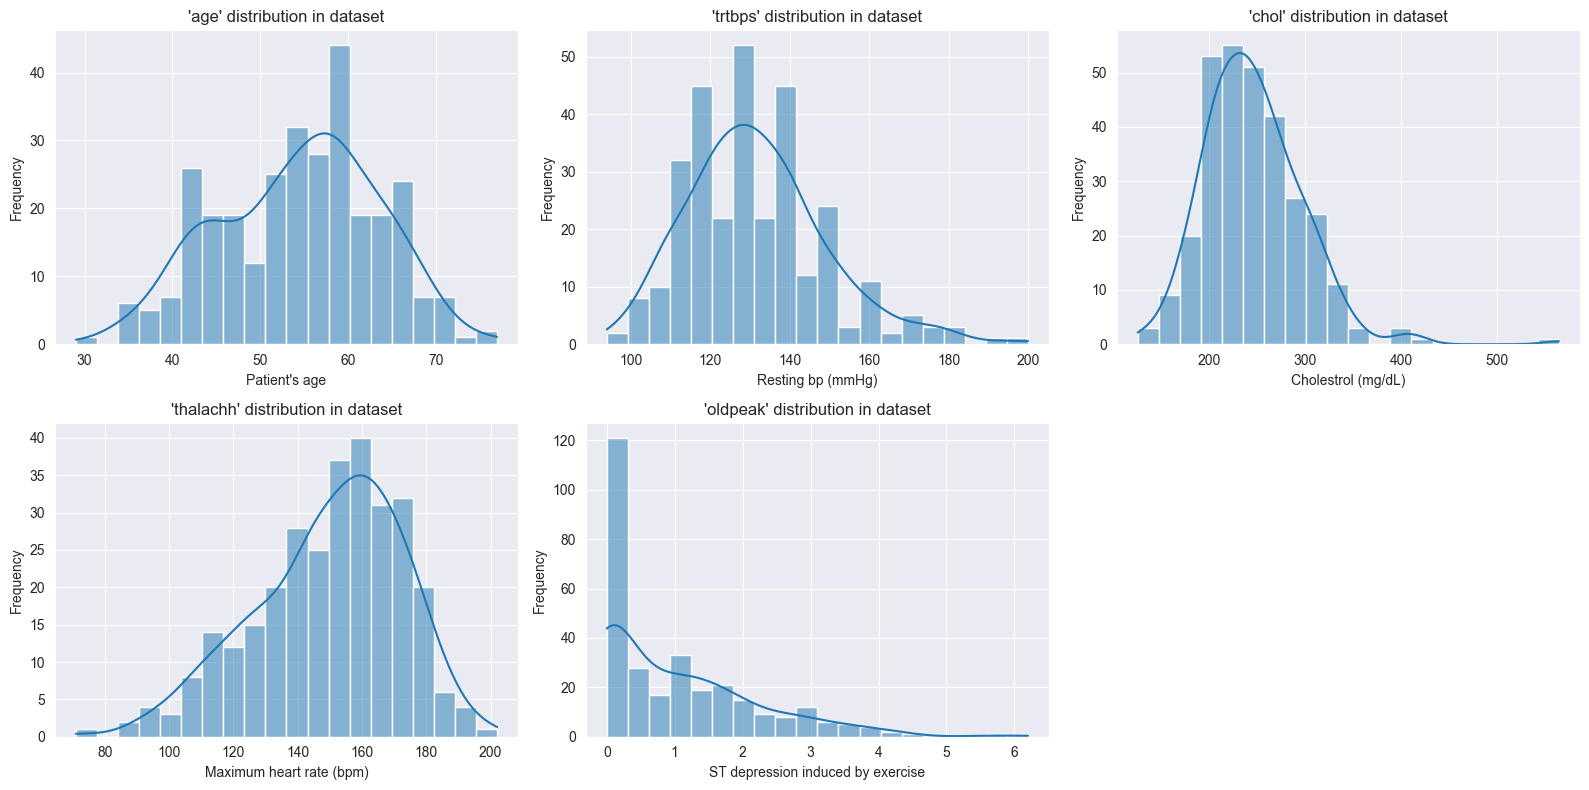

In [7]:
col_name = ["age", "trtbps", "chol", "thalachh", "oldpeak"]
col_label = ["Patient's age", "Resting bp (mmHg)", "Cholestrol (mg/dL)", "Maximum heart rate (bpm)", "ST depression induced by exercise"]

plot_histogram(data = data, col_names = col_name, col_labels = col_label)

[2024-05-06 21:58:26,738 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.]
[2024-05-06 21:58:26,744 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.]
[2024-05-06 21:58:26,767 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.]
[2024-05-06 21:58:26,771 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.]
[2024-05-06 21:58:26,798 - INFO - Using categorical units to plot a list of strings that are all par

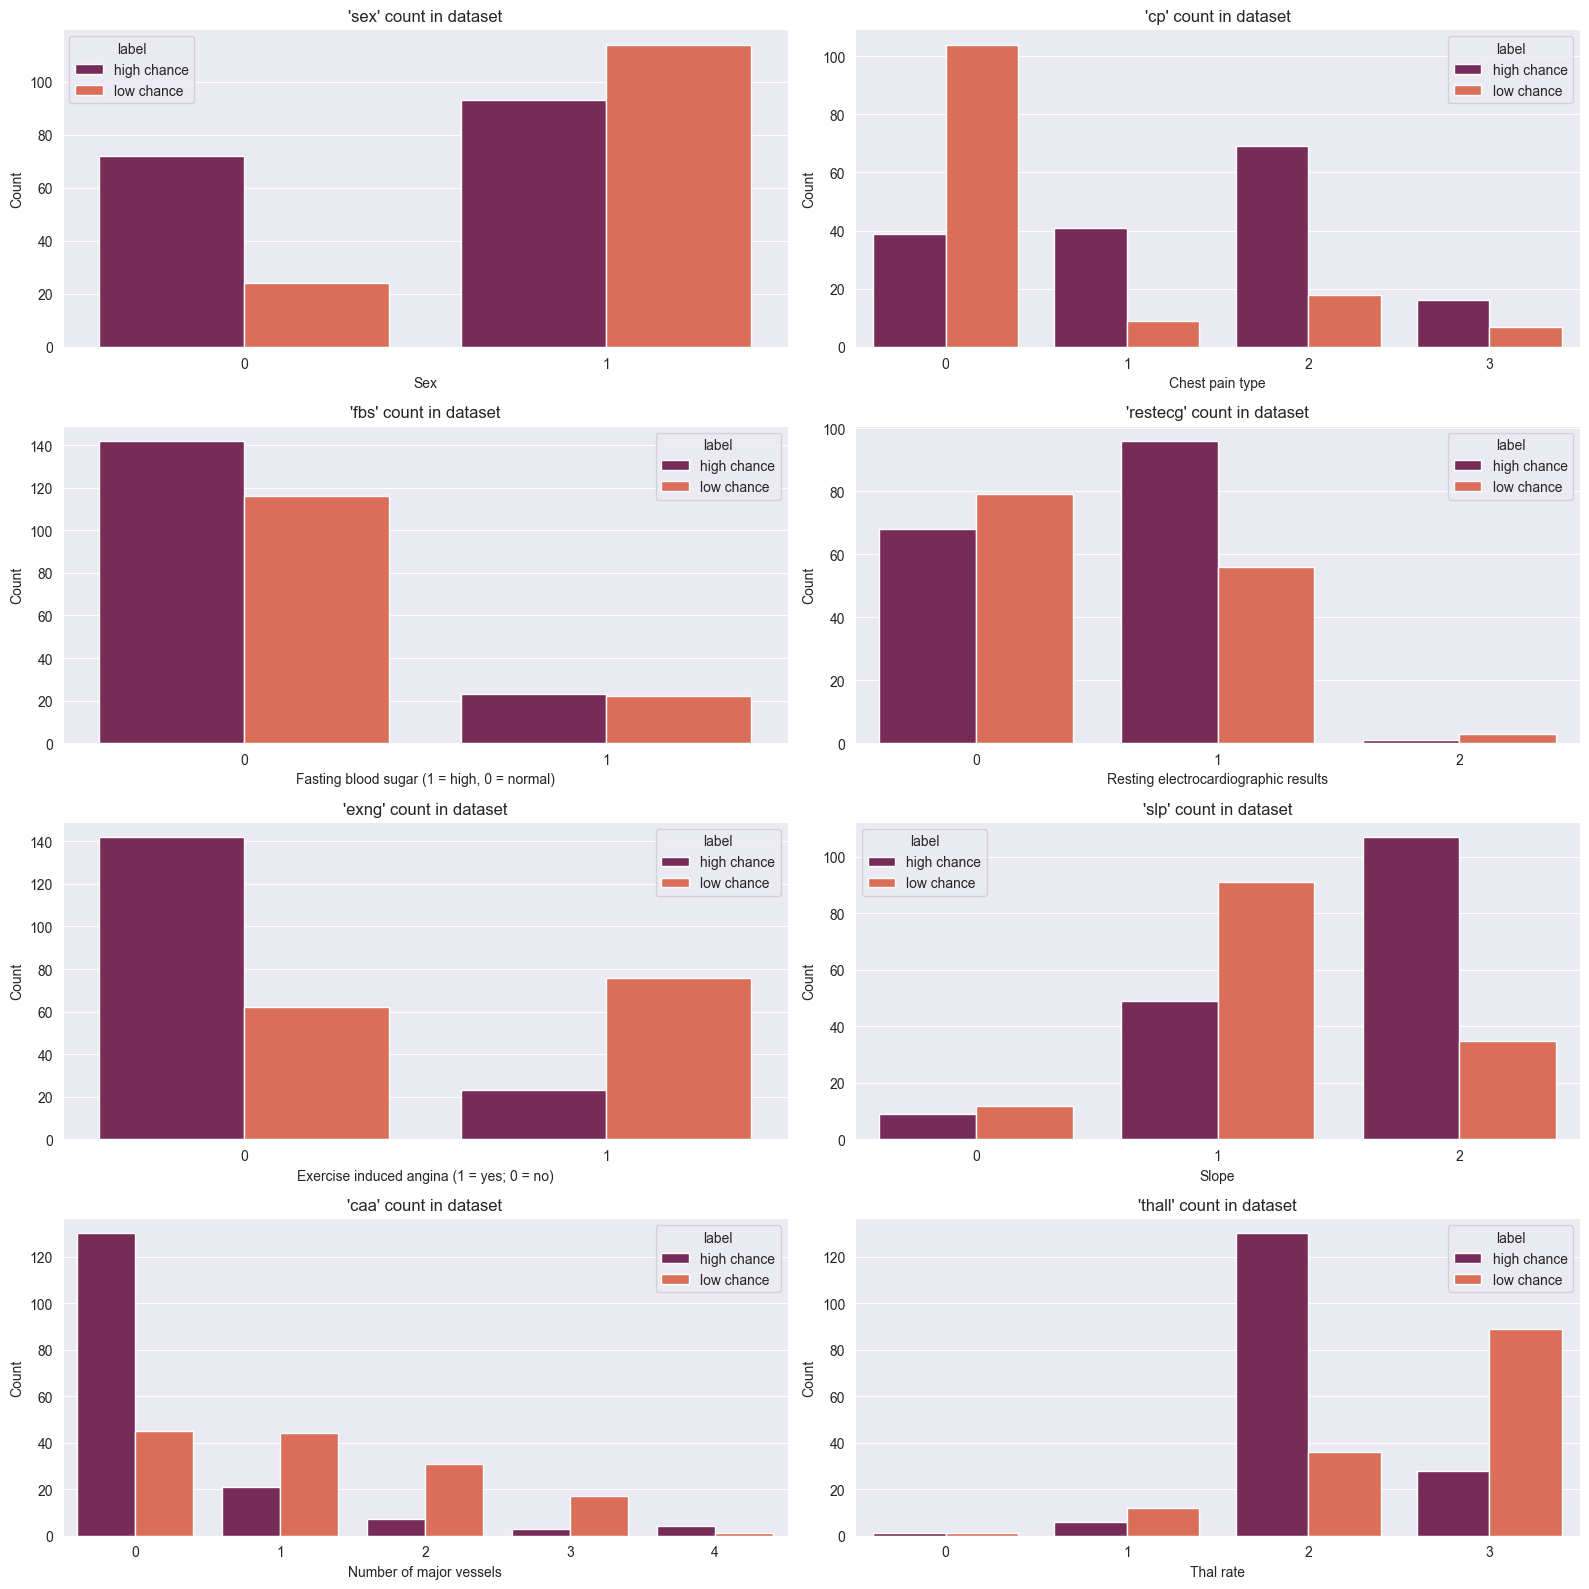

In [8]:
col_name = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']
col_label = ['Sex', 'Chest pain type', 'Fasting blood sugar (1 = high, 0 = normal)', 
          'Resting electrocardiographic results', 'Exercise induced angina (1 = yes; 0 = no)',
          'Slope', 'Number of major vessels', 'Thal rate']

plot_barchart(data = data, col_names = col_name, col_labels = col_label)

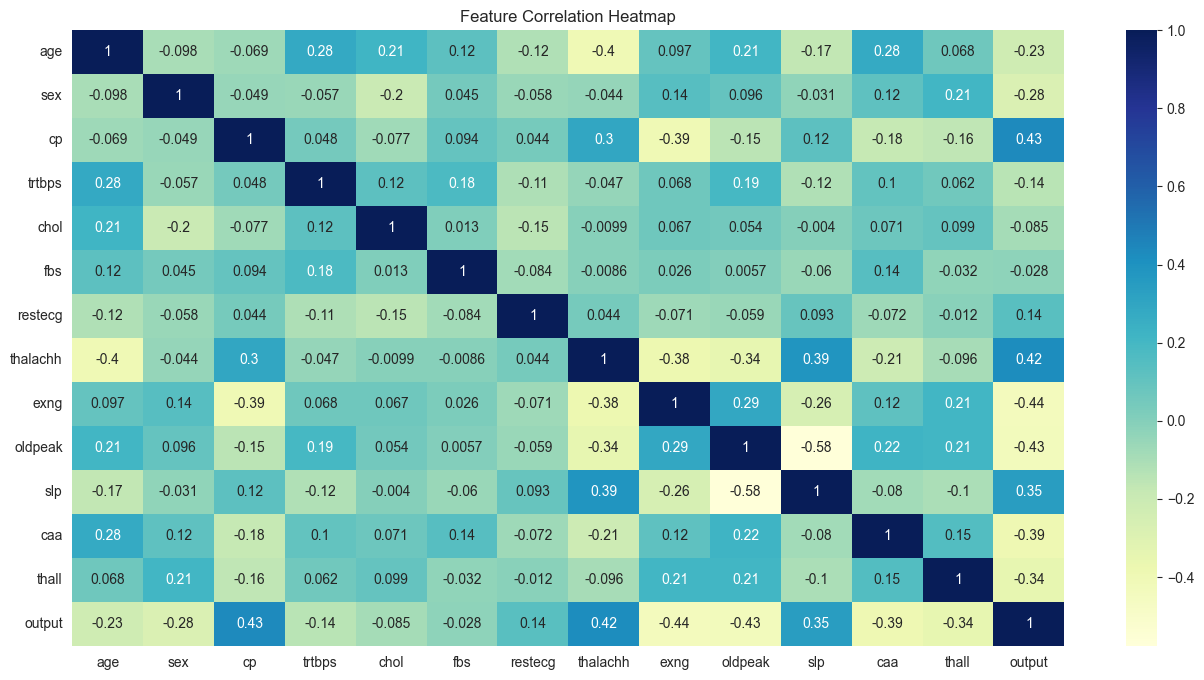

In [9]:
plot_correlation(data = data)

In [10]:
X = data.drop(labels = ["output", "label"], axis = 1)
y = data.output

In [11]:
X

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [12]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 21)

In [17]:
scaler = StandardScaler()
X_train_ = scaler.fit_transform(X_train)
X_test_ = scaler.transform(X_test)

In [15]:
hyperparameters = read_yaml("params.yaml")

In [16]:

params_grid = hyperparameters['svm']

best_params = find_best_params(name = 'SVM',
                               features = X_train_,
                               labels = y_train,
                               hyperparameters = params_grid)
print(best_params)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
{'C': 0.1, 'kernel': 'sigmoid'}


In [17]:
os.makedirs("models", exist_ok = True)
svm_model = SVC(C = 0.1, kernel = 'sigmoid')
svm_model.fit(X_train_, y_train.values.ravel())
save_model(svm_model, "svm.pkl")

In [18]:
params_grid = hyperparameters['lr']

best_params = find_best_params(name = 'Logistic',
                               features = X_train_,
                               labels = y_train,
                               hyperparameters = params_grid)
print(best_params)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
{'max_iter': 25, 'solver': 'lbfgs'}


In [19]:
lr_model = LogisticRegression(solver = "lbfgs", max_iter = 25)
lr_model.fit(X_train_, y_train)
save_model(lr_model, "lr.pkl")

In [20]:
lr = LogisticRegression()
lr_ = lr.fit(X_train_, y_train)

y_pred_lr = lr_.predict(X_test_)

print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

[[27  5]
 [ 6 23]]
              precision    recall  f1-score   support

           0       0.82      0.84      0.83        32
           1       0.82      0.79      0.81        29

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [21]:
lr_l2 = LogisticRegressionCV(Cs = 20, cv = 4, penalty = 'l2')
lr_l2_ = lr_l2.fit(X_train_, y_train)

y_pred_lr_l2 = lr_l2_.predict(X_test_)

print(confusion_matrix(y_test, y_pred_lr_l2))
print(classification_report(y_test, y_pred_lr_l2))

[[26  6]
 [ 7 22]]
              precision    recall  f1-score   support

           0       0.79      0.81      0.80        32
           1       0.79      0.76      0.77        29

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



In [22]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train_, y_train)

y_pred_knn = knn.predict(X_test_)

print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

[[24  8]
 [ 7 22]]
              precision    recall  f1-score   support

           0       0.77      0.75      0.76        32
           1       0.73      0.76      0.75        29

    accuracy                           0.75        61
   macro avg       0.75      0.75      0.75        61
weighted avg       0.75      0.75      0.75        61



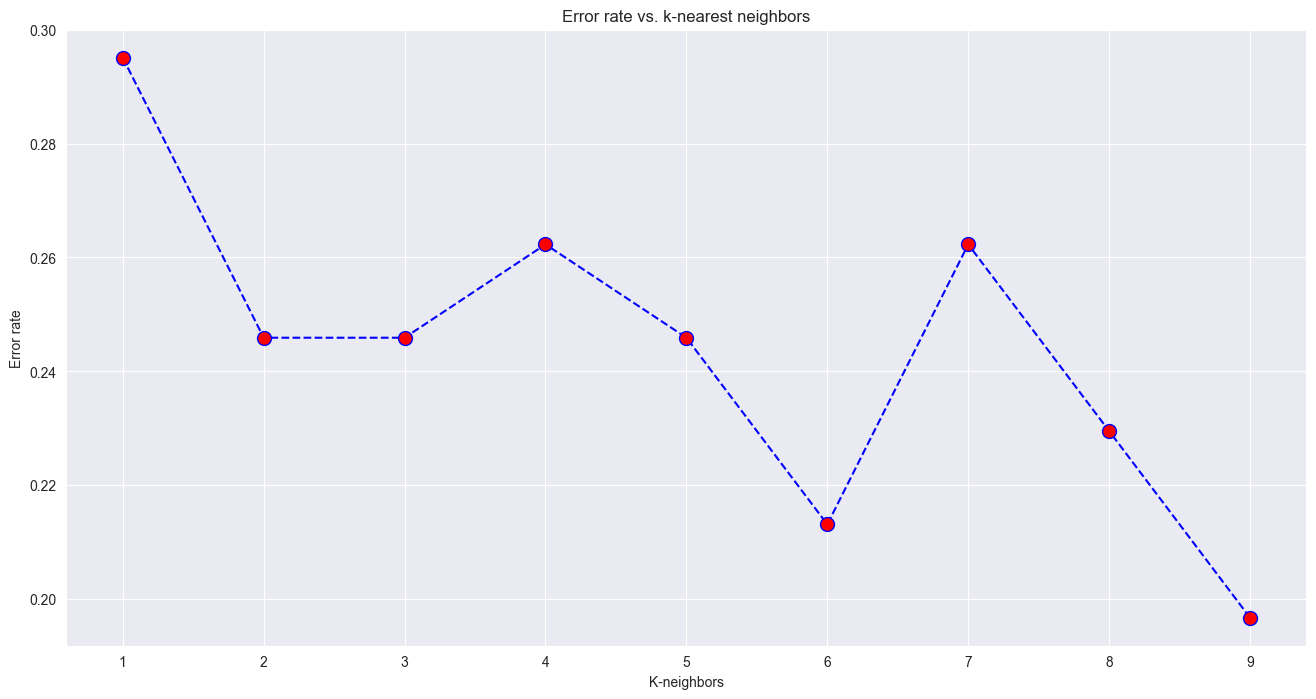

In [23]:
find_best_k(X_train_, y_train, X_test_, y_test)

In [27]:
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(X_train_, y_train)
save_model(knn, "knn.pkl")

knn_pred = knn.predict(X_test_)

print(confusion_matrix(y_test, knn_pred))
print(classification_report(y_test, knn_pred))

[[26  6]
 [ 6 23]]
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        32
           1       0.79      0.79      0.79        29

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [25]:
svm_test = load_model("svm.pkl")
svm_pred = svm_test.predict(X_test_)

print(confusion_matrix(y_test, svm_pred))
print(classification_report(y_test, svm_pred))

[[26  6]
 [ 6 23]]
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        32
           1       0.79      0.79      0.79        29

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [26]:
lr_test = load_model("lr.pkl")
lr_pred = lr_test.predict(X_test_)

print(confusion_matrix(y_test, lr_pred))
print(classification_report(y_test, lr_pred))

[[27  5]
 [ 6 23]]
              precision    recall  f1-score   support

           0       0.82      0.84      0.83        32
           1       0.82      0.79      0.81        29

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61

